In [5]:
import pandas as pd
import sqlalchemy
from sqlalchemy import text
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt

# Вказуємо, що будемо використовувати PyMySQL
pymysql.install_as_MySQLdb()

# Параметри бази даних
DB_TYPE = "mysql"
DB_HOST = "localhost"
DB_PORT = 3306
DB_NAME = "yelp"
DB_USER = "root"
DB_PASSWORD = "YOUR_PASSWORD"
TABLE_NAME = "yelp_attributes"

In [2]:
# Створення підключення до бази даних
try:
    # Формування URL-підключення
    db_url = f"{DB_TYPE}+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    
    # Створення руху двигуна
    engine = create_engine(db_url, pool_size=5, max_overflow=0)
    
    # Виконання запиту з використанням тимчасової таблиці
    with engine.connect() as connection:
        # Використовуємо text() для коректного виконання SQL
        connection.execute(text("""
        CREATE TEMPORARY TABLE IF NOT EXISTS coffee_shop_ratings AS
        SELECT
            b.stars AS StarRating,
            ROUND(AVG(a.RestaurantsPriceRange2), 1) AS PriceRange
        FROM yelp_business b
        INNER JOIN yelp_attributes a ON b.business_id = a.business_id
        WHERE b.state = 'LA' AND b.city = 'New Orleans' AND b.categories LIKE '%Coffee & Tea%'
        GROUP BY b.stars
        ORDER BY b.stars DESC;
        """))
        
        # Виконання запиту для отримання даних
        query = text("SELECT * FROM coffee_shop_ratings;")
        df = pd.read_sql(query, connection)
        
    # Виведення перших рядків
    print(df.head())

    

except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Помилка бази даних: {e}")
except Exception as e:
    print(f"Невідома помилка: {e}")

   StarRating  PriceRange
0         5.0         1.3
1         4.5         1.5
2         4.0         1.4
3         3.5         1.4
4         3.0         1.5


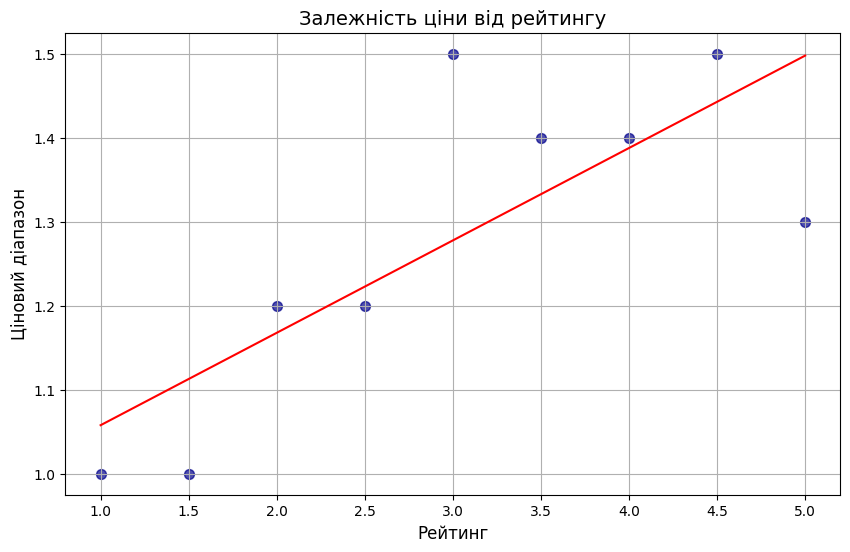

In [3]:
# Створення графіка розсіювання з додатковими налаштуваннями
df.plot(kind='scatter', x='StarRating', y='PriceRange', 
        color='darkblue', marker='o', s=50, alpha=0.7,
        figsize=(10, 6), grid=True)

# Додавання підписів до осей та заголовка
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Ціновий діапазон', fontsize=12)
plt.title('Залежність ціни від рейтингу', fontsize=14)

# Додавання лінії тренду (якщо необхідно)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['StarRating'], df['PriceRange'])
plt.plot(df['StarRating'], slope*df['StarRating']+intercept, color='red')

# Відображення графіка
plt.show()


   StarRating  NumReviews
0         5.0    268454.0
1         4.5   1504026.0
2         4.0   2224375.0
3         3.5   1357223.0
4         3.0    666514.0


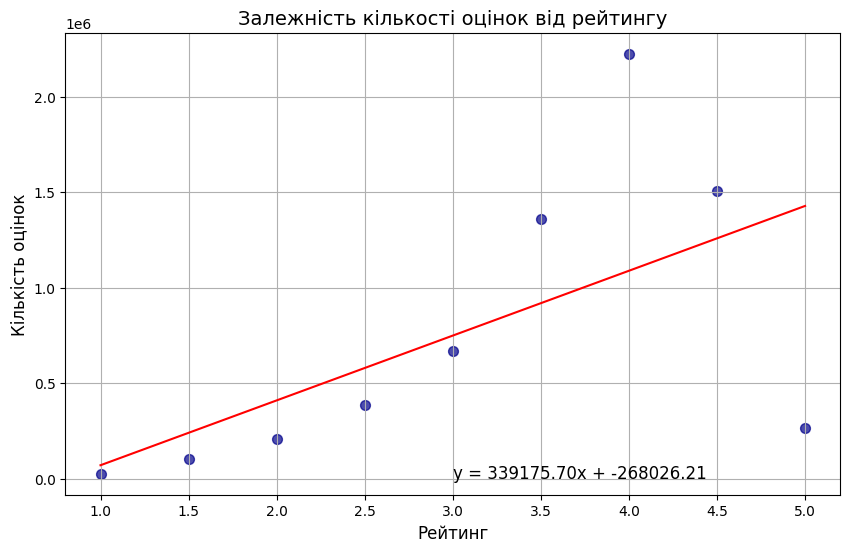

In [4]:
# Створення підключення до бази даних
try:
    # Формування URL-підключення
    db_url = f"{DB_TYPE}+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    
    # Створення руху двигуна
    engine = create_engine(db_url, pool_size=5, max_overflow=0)
    
    # Виконання запиту з використанням тимчасової таблиці
    with engine.connect() as connection:
        # Використовуємо text() для коректного виконання SQL
        connection.execute(text("""
        CREATE TEMPORARY TABLE IF NOT EXISTS coffee_shop_review_ratings AS
        SELECT
        	stars AS StarRating,
            SUM(review_count) AS NumReviews
        FROM yelp_business
        GROUP BY stars
        ORDER BY stars DESC;
        """))
        
        # Виконання запиту для отримання даних
        query2 = text("SELECT * FROM coffee_shop_review_ratings;")
        df_review_ratings = pd.read_sql(query2, connection)
        
    # Виведення перших рядків
    print(df_review_ratings.head())
    df_review_ratings.plot(kind='scatter', x='StarRating', y='NumReviews', 
                       color='darkblue', marker='o', s=50, alpha=0.7,
                       figsize=(10, 6), grid=True)

    plt.xlabel('Рейтинг', fontsize=12)
    plt.ylabel('Кількість оцінок', fontsize=12)
    plt.title('Залежність кількості оцінок від рейтингу', fontsize=14)

    slope, intercept, r_value, p_value, std_err = linregress(df_review_ratings['StarRating'], df_review_ratings['NumReviews'])
    plt.plot(df_review_ratings['StarRating'], slope*df_review_ratings['StarRating']+intercept, color='red')

    # Додавання анотації
    plt.text(3, 200, f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12)

    plt.show()

    

except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Помилка бази даних: {e}")
except Exception as e:
    print(f"Невідома помилка: {e}")